<a href="https://www.kaggle.com/code/ibrahimnibrahim/water-quality-and-potability-with-ml-and-dl?scriptVersionId=244281493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-and-potability/water_potability.csv


In [2]:
df=pd.read_csv('/kaggle/input/water-quality-and-potability/water_potability.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.dropna(axis=0,inplace=True)
# or
# df.fillna(0.001,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [6]:
X = df.drop(columns=['Potability'])
y = df['Potability']

# num_cols = X.select_dtypes(include=['int64', 'float64']).columns
# X[num_cols] = X[num_cols].fillna(X[num_cols].median())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importances.head(10))

           Feature  Importance
4          Sulfate    0.145319
0               ph    0.141842
3      Chloramines    0.116640
1         Hardness    0.114823
2           Solids    0.110544
7  Trihalomethanes    0.095853
5     Conductivity    0.093345
8        Turbidity    0.091006
6   Organic_carbon    0.090627


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Binary Classification Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Passive Aggressive': PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    'SVM': SVC(max_iter=1000, probability=True, random_state=42),  # probability=True for ROC-AUC
    'Linear SVM': LinearSVC(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "Not Available"
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    
    results[name] = {
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': report
    }
    
    print(f"\n{name}")
    print("-" * 40)
    print(f"Accuracy: {accuracy:.4f}")
    if roc_auc != "Not Available":
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(report)
    print("=" * 60)


Random Forest
----------------------------------------
Accuracy: 0.7246
ROC-AUC: 0.7262

Confusion Matrix:
[[223  29]
 [ 82  69]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      0.88      0.80       252
     Class 1       0.70      0.46      0.55       151

    accuracy                           0.72       403
   macro avg       0.72      0.67      0.68       403
weighted avg       0.72      0.72      0.71       403


Extra Trees
----------------------------------------
Accuracy: 0.7047
ROC-AUC: 0.7573

Confusion Matrix:
[[222  30]
 [ 89  62]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.71      0.88      0.79       252
     Class 1       0.67      0.41      0.51       151

    accuracy                           0.70       403
   macro avg       0.69      0.65      0.65       403
weighted avg       0.70      0.70      0.68       403


Gradient Boosting
-------------------

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



SVM
----------------------------------------
Accuracy: 0.7146
ROC-AUC: 0.7102

Confusion Matrix:
[[231  21]
 [ 94  57]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.71      0.92      0.80       252
     Class 1       0.73      0.38      0.50       151

    accuracy                           0.71       403
   macro avg       0.72      0.65      0.65       403
weighted avg       0.72      0.71      0.69       403


Linear SVM
----------------------------------------
Accuracy: 0.6377

Confusion Matrix:
[[251   1]
 [145   6]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.63      1.00      0.77       252
     Class 1       0.86      0.04      0.08       151

    accuracy                           0.64       403
   macro avg       0.75      0.52      0.43       403
weighted avg       0.72      0.64      0.51       403


KNN
----------------------------------------
Accuracy: 0.6576
RO

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Explicit input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Added ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),  # Added ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Correct for binary classification
])

# Improved compilation with metrics and better optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Better default optimizer
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')  # Useful for binary classification
    ]
)

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(
        monitor='val_auc',    # Monitor validation loss
        patience=40,          
        verbose=1,
        restore_best_weights=True  # Critical for getting best weights
    )

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=1000,              
    batch_size=32,
    callbacks=[es],
    verbose=0
)
model.evaluate(X_test, y_test)

Epoch 763: early stopping
Restoring model weights from the end of the best epoch: 723.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6844 - auc: 0.7114 - loss: 0.5717 - precision: 0.6299 - recall: 0.4459 


[0.5729678869247437,
 0.6774193644523621,
 0.5945945978164673,
 0.4370861053466797,
 0.721092164516449]

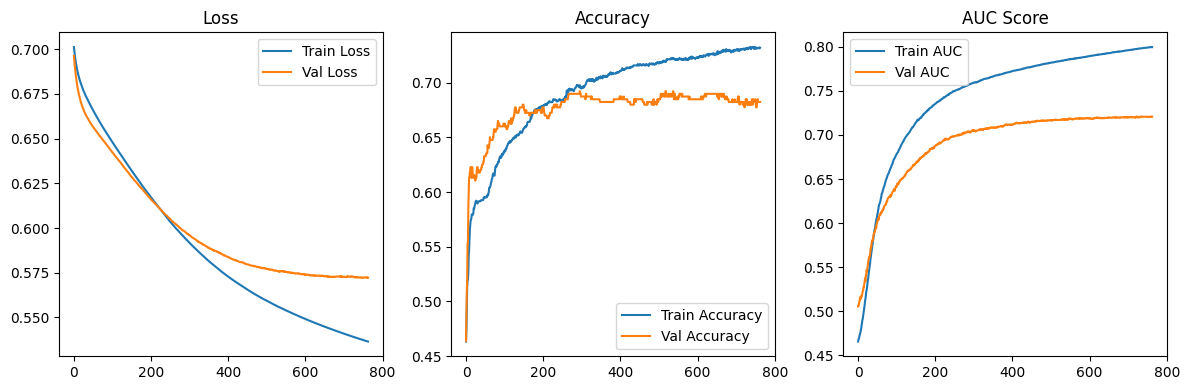

In [13]:
import matplotlib.pyplot as plt

def plot_binary_classification_history(history):
    plt.figure(figsize=(12, 4))
    
    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 3, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    # AUC plot
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Val AUC')
    plt.title('AUC Score')
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()

# Usage when you have AUC in metrics
plot_binary_classification_history(history)